# Task 3

## Importo le librerie

In [0]:
import os
from matplotlib import pyplot as plt
from time import time
import joblib
import zipfile
import numpy as np

from skimage import feature
from sklearn.neighbors import KDTree
from keras.preprocessing import image as kimage
from keras.applications import resnet50

Using TensorFlow backend.


In [0]:
!wget https://www.dropbox.com/s/jp28jnytz9wxr1o/Pandora_retrival.zip

In [0]:
zip = zipfile.ZipFile('Pandora_retrival.zip')
zip.extractall()
zip.close()

In [0]:
maximages = 18000

## Caricamento delle immagini

In [0]:
def dummy(image):
    return image

# Caricamento delle immagini
def load_data(feature_extractor=dummy):
    base_path = 'Pandora_retrival/'

    paths = []
    features = []

    for fi,f in enumerate(sorted(os.listdir(base_path))):
        if f.endswith('.jpg') and fi<maximages:
            # Memorizza percorso file
            cur_path = base_path + f
            paths.append(cur_path)
            
            # Carica file ed estraine le features
            image = kimage.load_img(cur_path, target_size=(224, 224))
            cur_features = feature_extractor(image)
            features.append(cur_features)

    features = np.array(features)
    return features, paths

## Estrazione delle features neurali

In [0]:
net = resnet50.ResNet50(include_top=False, weights='imagenet', pooling='max')
def resnet_features(img):
    x = kimage.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = resnet50.preprocess_input(x)
    f = net.predict(x)
    return f.flatten()

In [0]:
t0 = time()
X_train, paths = load_data(feature_extractor=resnet_features)
print("Caricamento e feature extraction in %0.3f secondi" % (time() - t0))

Caricamento e feature extraction in 615.075 secondi


## Costruzione dell'albero di ricerca

In [0]:
tree = KDTree(X_train)

## Interrogazione dell'albero di ricerca

In [0]:
query_image = kimage.load_img('DSC_0365.jpg', target_size=(224, 224))

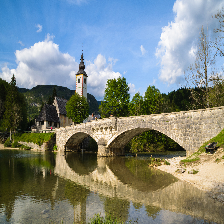

In [0]:
query_image

In [0]:
query_features = resnet_features(query_image).reshape(1,-1)

In [0]:
_, ind = tree.query(query_features, k=10)

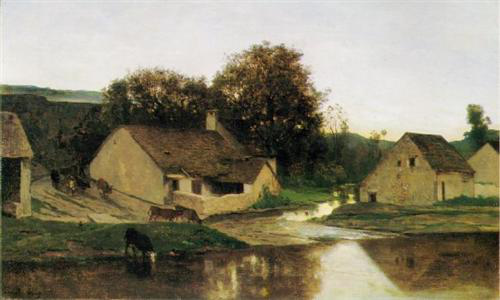

In [0]:
kimage.load_img(paths[ind[0][0]])